GitHub deposunu klonlıyorum ve PyTorch ile GPU'yu kontrol etme işlemini yapıyorum


In [18]:
!git clone https://github.com/ultralytics/yolov5.git # clone
%cd yolov5
%pip install -r requirements.txt # kurulum

import torch
import utils
display = utils.notebook_init()  

YOLOv5 🚀 v7.0-71-gc442a2e Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.7/78.2 GB disk)


Roboflow'dan veri setimi çekiyorum

In [19]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="your api key")
project = rf.workspace("is-noi91").project("deneme-dp6m2")
dataset = project.version(1).download("yolov5")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to deneme-1 in yolov5pytorch:: 100%|██████████| 588/588 [00:00<00:00, 1344.00it/s]


İnstance segmantation ile eğitim yapıyorum

In [20]:
!python segment/train.py --img 320 --batch 128 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s-seg.pt


segment/train: weights=yolov5s-seg.pt, cfg=, data=/content/yolov5/yolov5/yolov5/yolov5/deneme-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=128, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train-seg, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-71-gc442a2e Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s

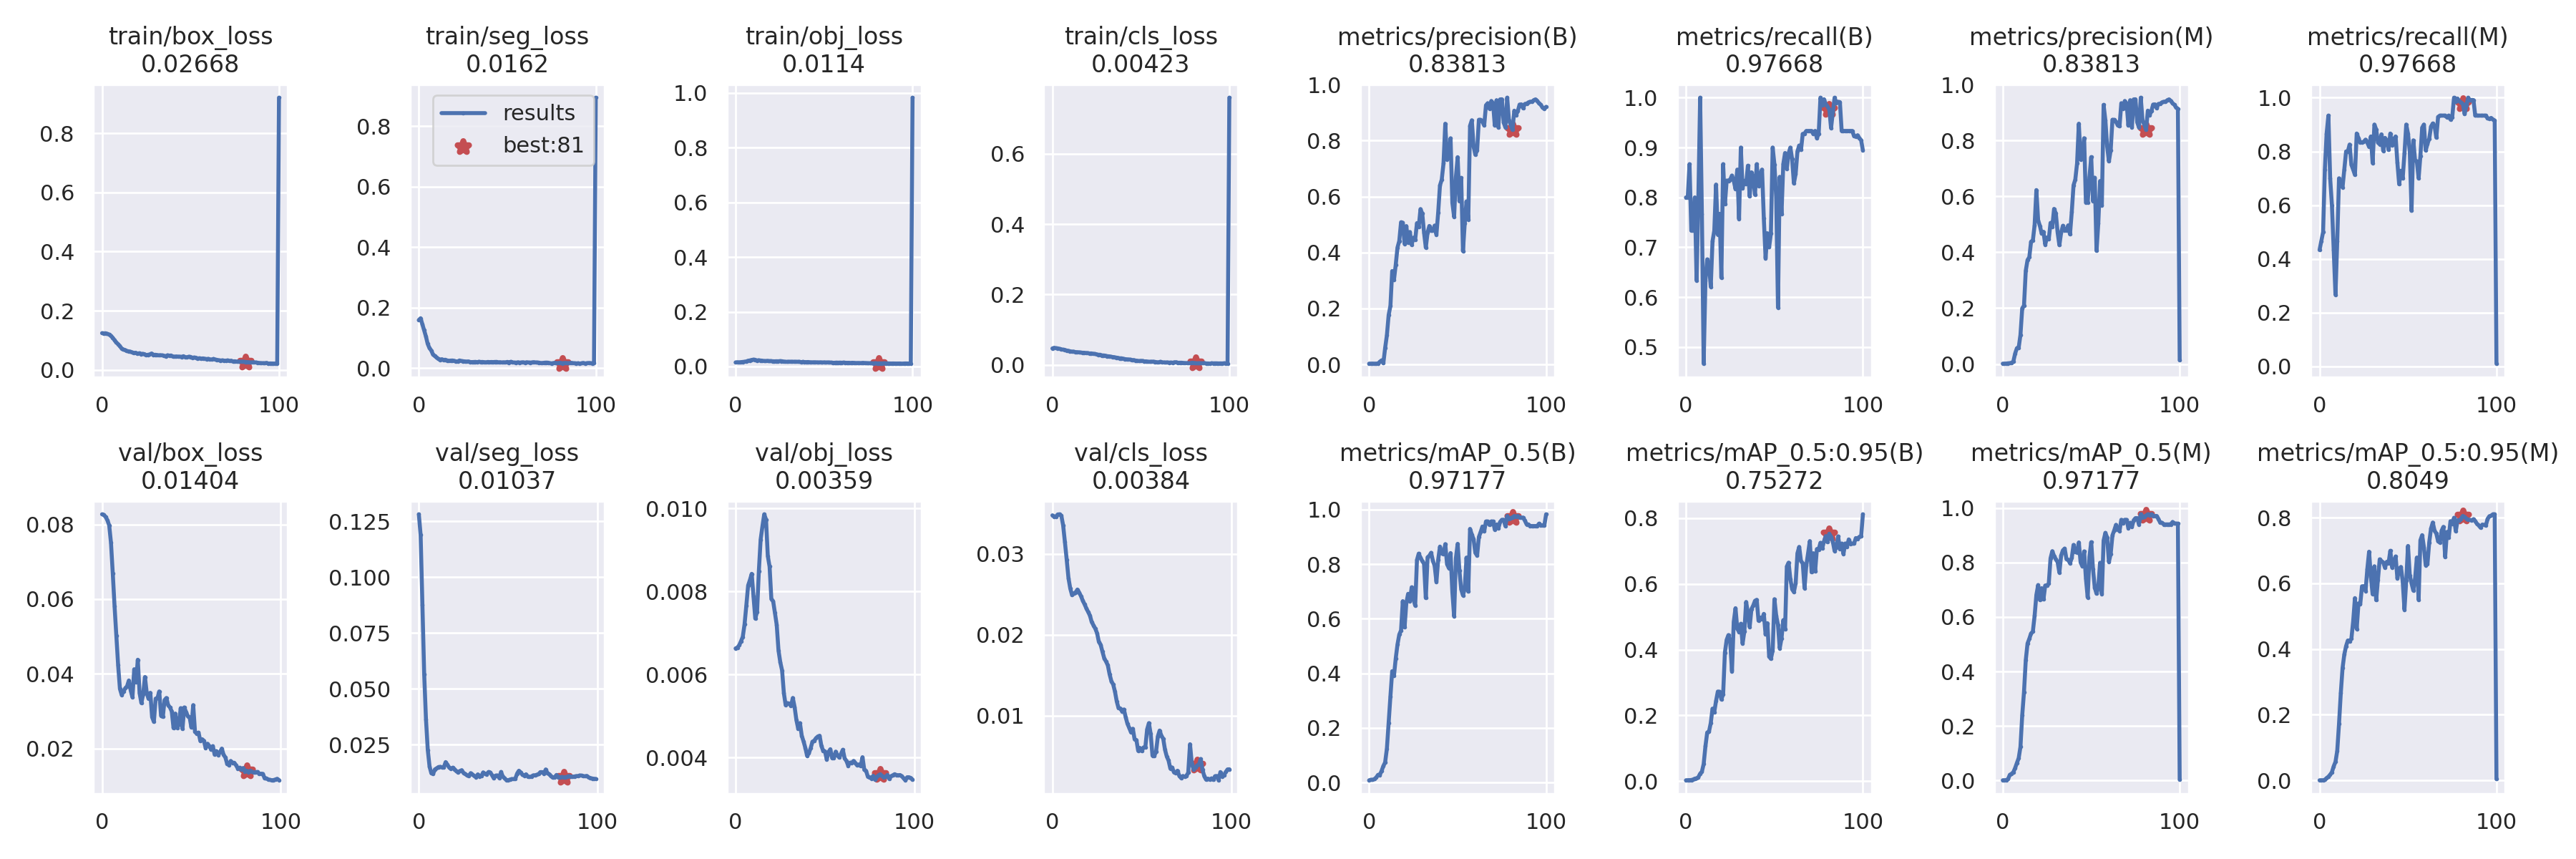

In [21]:
display.Image(filename=f'runs/train-seg/exp/results.png', width=1200)

Test ve validation işlemini gerçekleştiriyorum

In [22]:
!python segment/val.py --weights runs/train-seg/exp/weights/best.pt --data {dataset.location}/data.yaml --img 320

segment/val: data=/content/yolov5/yolov5/yolov5/yolov5/deneme-1/data.yaml, weights=['runs/train-seg/exp/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-71-gc442a2e Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7403816 parameters, 0 gradients, 25.7 GFLOPs
val: Scanning /content/yolov5/yolov5/yolov5/yolov5/deneme-1/valid/labels.cache... 21 images, 1 backgrounds, 0 corrupt: 100% 21/21 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.33it/s]
                   all         21         20      0.838      0.977      0.972      0.753      0

Hazırladığım veri setinden çıkarım sonuçları;

segment/predict: weights=['runs/train-seg/exp/weights/best.pt'], source=/content/yolov5/yolov5/yolov5/yolov5/deneme-1/test/images/Kus-13_jpg.rf.09646975274fb9d1819127a6716825f5.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-71-gc442a2e Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7403816 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/yolov5/yolov5/yolov5/deneme-1/test/images/Kus-13_jpg.rf.09646975274fb9d1819127a6716825f5.jpg: 320x320 1 bird, 9.2ms
Speed: 0.3ms pre-process, 9.2ms inference, 1.5ms NMS per image at shape (1, 3,

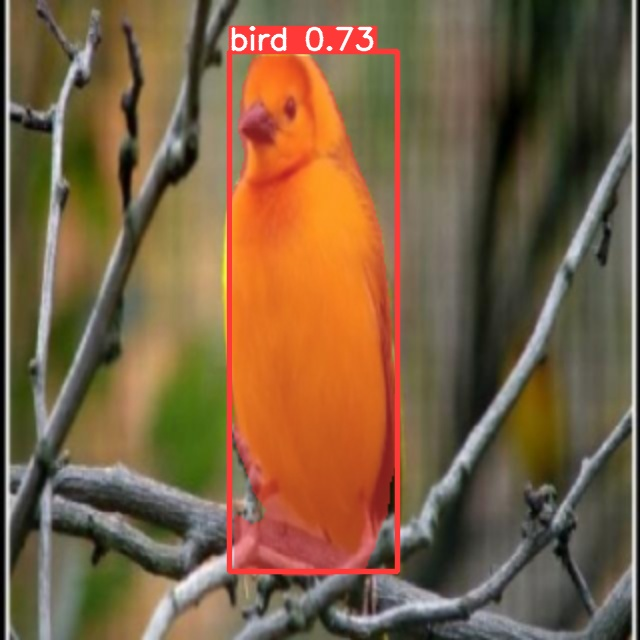

In [24]:
import os
#Get the path of an image from the test or validation set
if os.path.exists(os.path.join(dataset.location, "test")):
  split_path = os.path.join(dataset.location, "test", "images")
else:
  split_path = os.path.join(dataset.location, "valid", "images")
example_image_name = os.listdir(split_path)[8]
example_image_path = os.path.join(split_path, example_image_name)

#Infer
!python segment/predict.py --img 320 --weights runs/train-seg/exp/weights/best.pt --source {example_image_path}
display.Image(filename=f'runs/predict-seg/exp/{example_image_name}', width=600)

İnstance Segmantation yapılan eğitim işleminden sonra sonuç olarak görüntü verimiz
